S04_T02 : Visualització de Múltiples Variables
---
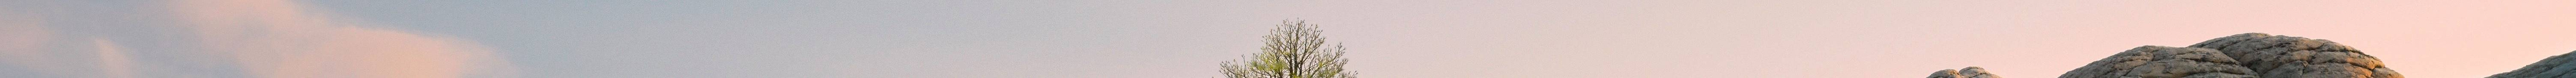
*PART_2*

PRACTICE 2
---
---

## Import Libraries and Data
---

In [3]:
# imported libraries

# import data manipulation libraries:
import pandas as pd
import numpy as np

# import regular expressions to search patterns:
import re


A quick peek at the dataframe:
---

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# DataFrame, importing data:
movies = pd.read_csv('movies.dat', 
                    engine = 'python', 
                    encoding = 'latin1', 
                    error_bad_lines = False, 
                    warn_bad_lines = False)

# To show lots of rows and columns:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

print(movies.head())


  1::Toy Story (1995)::Animation|Children's|Comedy
0  2::Jumanji (1995)::Adventure|Children's|Fantasy
1       3::Grumpier Old Men (1995)::Comedy|Romance
2        4::Waiting to Exhale (1995)::Comedy|Drama
3    5::Father of the Bride Part II (1995)::Comedy
4            6::Heat (1995)::Action|Crime|Thriller


The parameter **error_bad_lines** skip the invalid rows and change the dimension of the data frame. *Invalid rows are extra delimiter characters in the same row.* If we specify **error_bad_lines = False**, this will load the data into Python while skipping the bad lines, but with **warnings** of the skipped lines. To suppress this warning, we can set **warn_bad_lines = False.**

How many observations?
--

In [5]:
print(
    f'Movies dataframe has {movies.shape[0]} rows and {movies.shape[1]} columns.'
    )

Movies dataframe has 2889 rows and 1 columns.


## Data Cleaning
---
*It's the process of cleaning messy data and transforming them into appropriate formats for further analysis and modeling.*

Raw data. Movie titles are divided by the double point and the film genres separated by a vertical bar. Therefore I use the double point as a separator to make the titles easier to read and the vertical bar to split the film genres for each movie.

In the following table, I shape the raw data into new columns, this way it's easier to extract information from the data frame.

Description of the new variables
---  

| Variable      | Description                    |
| :------------:| -------------------------------|
| Movie         | English-speaking film titles   |
| Original title| Foreign film titles            |
| Year          | Movie release year             |
| Genre         | Cinematographic genres for each film|

*I assume the movies that only contain English titles are English-speaking. And movies with more than one title are non-English speaking.*

In [6]:
# Renaming columns
col_names = ["Movie", "Genres"]

# DataFrame
movies = pd.read_csv('movies.dat',
                     sep='::',
                     engine='python',
                     encoding='latin1',
                     header=None,
                     names=col_names)

# Returns the first few rows:
movies.tail()

,Movie,Genres
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama
3951,Two Family House (2000),Drama
3952,"Contender, The (2000)",Drama|Thriller


In [7]:
## Adding new columns for:

# Original titles 'Original_Title'
movies['Original_Title'] = movies['Movie'].str.extract(r'\((\w.*[aA-zZ])\)')

# Release date 'Year'
movies['Year'] = movies['Movie'].str.extract(r'\((\d{4})\)')

# Extracting only movie titles 'Movie'
movies['Movie'] = movies['Movie'].replace('(\s\(\w.*\))', '', regex=True)

## New dataframe for film genres 'Genres':
Genres_df = movies['Genres'].str.split('|', expand=True)
Genres_df.columns = ['Genres_' + str(x) for x in range(len(Genres_df.columns))]

## Deleting the column of film genre:
movies = movies.drop(['Genres'], axis=1)

## Concatenate:
film = pd.concat([movies, Genres_df], axis=1)
film.head()

,Movie,Original_Title,Year,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5
1,Toy Story,NaN,1995,Animation,Children's,Comedy,None,None,None
2,Jumanji,NaN,1995,Adventure,Children's,Fantasy,None,None,None
3,Grumpier Old Men,NaN,1995,Comedy,Romance,None,None,None,None
4,Waiting to Exhale,NaN,1995,Comedy,Drama,None,None,None,None
5,Father of the Bride Part II,NaN,1995,Comedy,None,None,None,None,None


### Inspecting the dataframe
---

In [8]:
# Returns the number of rows and columns of the df:
print(f'Movies dataframe has {film.shape[0]} rows and {film.shape[1]} columns.')

Movies dataframe has 3883 rows and 9 columns.


In [9]:
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Movie           3883 non-null   object
 1   Original_Title  253 non-null    object
 2   Year            3883 non-null   object
 3   Genres_0        3883 non-null   object
 4   Genres_1        1858 non-null   object
 5   Genres_2        536 non-null    object
 6   Genres_3        115 non-null    object
 7   Genres_4        15 non-null     object
 8   Genres_5        1 non-null      object
dtypes: object(9)
memory usage: 303.4+ KB


In [10]:
# Changing the data type from 'Year'  to 'int64':
film['Year'] = film['Year'].astype('int64')

# Checking the Year dtype:
print(f'The dtype for "Year" is: {film.Year.dtype}')

The dtype for "Year" is: int64


The *.info()* method displays information about the data type and the number of missing values for each column. We can see that the variable **Year** does not have the expected data type, int or datetime. In this case, as it is only the release year, there is no need to change it to datetime but to int.

Descriptive statistics
----
---

In [11]:
# Displays a summary statistics for each column:
film.describe(include='all')

,Movie,Original_Title,Year,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5
count,3883,253,3883.000000,3883,1858,536,115,15,1
unique,3833,251,NaN,18,17,15,13,6,1
top,Hamlet,Narayama Bushiko,NaN,Drama,Drama,Thriller,Thriller,Thriller,War
freq,5,2,NaN,1176,381,120,40,3,1
mean,NaN,NaN,1986.066959,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,16.895690,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1919.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1994.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN,NaN


1. In Original_Title, "count" and "unique" rows, why are the values different?

In [12]:
## Cuenta los valores y la frecuencia en que aparecen (para Original_Title):
og = film['Original_Title'].value_counts()[:3]
print('Most freq. values  :::::::::::::::::\n', og)

# Lista con los valores mas frecuentes:
ogt = ["Narayama Bushiko", "Gojira"]

# Para filtrar en el dataframe "isin()":
print('\n·The isin () method filters by the dataframe a particular (or multiple) value in the column.\n·If it matches, it returns "True", otherwise "False".')
film[film["Original_Title"].isin(ogt)].sort_values(by='Original_Title')

Most freq. values  :::::::::::::::::
 Narayama Bushiko                2
Gojira                          2
Yao a yao yao dao waipo qiao    1
Name: Original_Title, dtype: int64

·The isin () method filters by the dataframe a particular (or multiple) value in the column.
·If it matches, it returns "True", otherwise "False".


,Movie,Original_Title,Year,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5
2363,Godzilla,Gojira,1954,Action,Sci-Fi,None,None,None,None
2364,Godzilla,Gojira,1984,Action,Sci-Fi,None,None,None,None
854,"Ballad of Narayama, The",Narayama Bushiko,1958,Drama,None,None,None,None,None
2512,"Ballad of Narayama, The",Narayama Bushiko,1982,Drama,None,None,None,None,None


## Exploratory Data Analysis (EDA)
---

In [13]:
## Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import squarify # for Treemaps visualization

## Includes graphics on notebook below to code cell
%matplotlib inline

#### ***What is the most common film genre?***

In [14]:
## Gen:
'''
1. stack() stack the movie genres.
2. sort_index() sort by index.
'''
Gen = Genres_df.stack().value_counts()
Gen_sorted = Genres_df.stack().value_counts().sort_index()

## Get the film genres:
Gen_index = Gen.index
Gen_sorted_index = Gen_sorted.index

## Get the film_genres values to np array:
Gen_np = Gen.to_numpy()
Gen_sorted_np = Gen_sorted.to_numpy()


In [15]:
# TOP 5 MOST FREQUENT GENRES:
Gen.head()

Drama       1603
Comedy      1200
Action       503
Thriller     492
Romance      471
dtype: int64

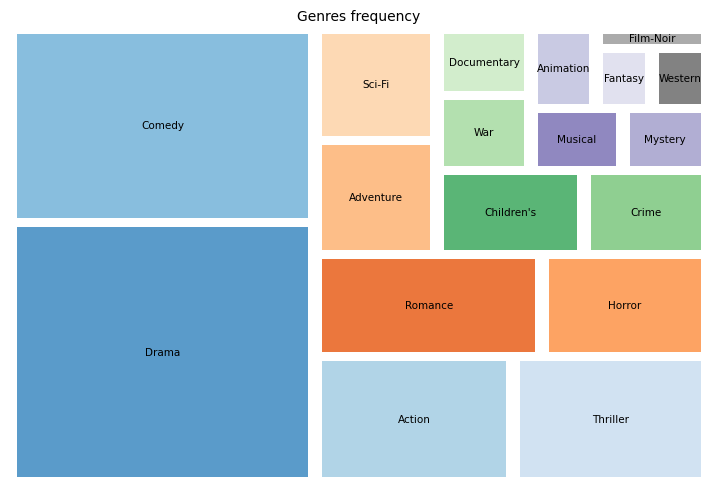

In [33]:
## FIGURE:
plt.figure(figsize=(9,6), dpi=100)

## PLOT:
squarify.plot(
    sizes=Gen_np, 
    label=Gen_index, 
    alpha=.8,
    color=plt.cm.tab20c.colors,
    pad = True,
    text_kwargs={'color':'black', 'size':7.5})

## ADDITIONAL PARAMETERS:
# Title:
plt.title('Genres frequency', size=10)
# Hide axis:
plt.axis('off')
# Print plot:
plt.show() 

Function of colors: We can see 5 groups of colors, in each group the most intense color are the genres with more films in each color group.

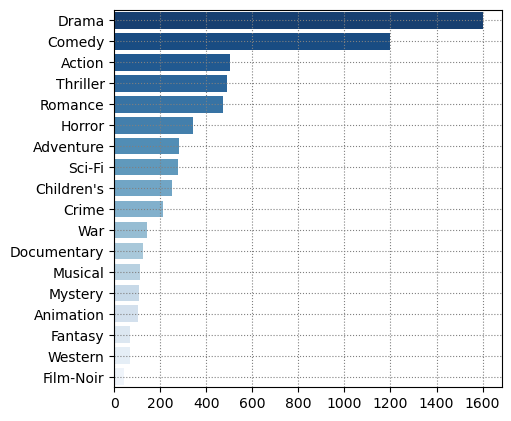

In [28]:
## SORTED PLOT BY VALUE:

#Figure
plt.figure(figsize=(5,5), dpi=100)

# Barplot
sns.barplot(x=Gen_np, 
            y=Gen_index, 
            palette='Blues_r', #palette='CMRmap','RdPu_r' 
            orient='h')

# Grid
plt.grid(b = True, color = 'gray',linestyle=':');

#### ***What is the number of foreign language films?***

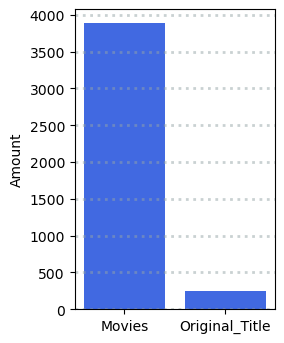

In [18]:
# VARIABLES:
mv = film['Movie'].value_counts().sum()
og = film['Original_Title'].value_counts().sum()

## FIGURE:
fig = plt.figure(figsize=(4,3), dpi=100)
ax = fig.add_axes([0,0,0.5,1])

# x,y axis:
name = ['Movies', 'Original_Title']
values = [mv, og]

## PLOT:
plt.bar(name, values, color='royalblue')
# Label
plt.ylabel('Amount')

# Grid
plt.grid(color='#95a5a6', linestyle=':', linewidth=2, axis='y', alpha=0.5)

# Show plot
plt.show()

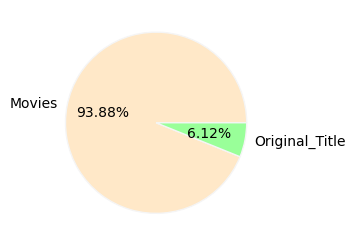

In [35]:
## Figure
fig = plt.figure(figsize=(4,3), dpi=100)

## Set of colors
colors = ['#ffe8c8','#99ff99']

## PLOT
plt.pie(values,
        labels = name, 
        labeldistance = 1.1,
        textprops={'fontsize': 10, 'color':'black'},
        autopct = '%1.2f%%',
        colors = colors, 
        wedgeprops = {'linewidth' : 1, 'edgecolor' : 'whitesmoke'}
        );

Original_Title are movies with non-English or foreign-speaking titles.  
In this dataset *6.12%* represents non-English or foreign-speaking movies.

#### ***Evolution in film production***

In [20]:
# Renaming columns:
col_names = ["Movie", "Genres"]

# DataFrame:
movies_df = pd.read_csv('movies.dat',
                     sep='::',
                     engine='python',
                     encoding='latin1',
                     header=None,
                     names=col_names)

# Release date to 'Year':
movies_df['Year'] = movies_df['Movie'].str.extract(r'\((\d{4})\)')

# Extracting only movie titles to 'Movie':
movies_df['Movie'] = movies_df['Movie'].replace('(\s\(\w.*\))', '', regex=True)

## New dataframe for film genres 'Genres':
Genres_df = movies_df['Genres'].str.split('|', expand=True)
Genres_df.columns = ['Genres_' + str(x) for x in range(len(Genres_df.columns))]

# Deleting the orignal column of film 'Genres' and 'Movie':
movies_df = movies_df.drop(['Genres', 'Movie'], axis=1)

# Concatenate both df: Gneres_df + movies:
film = pd.concat([movies_df, Genres_df], axis=1)

# Changing the data type from 'Year'  to 'int64':
film['Year'] = film['Year'].astype('int64')

# Setting 'Year' as new index:
film.set_index('Year',inplace=True)

film.tail()

,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5
Year,,,,,,
2000,Comedy,None,None,None,None,None
2000,Drama,None,None,None,None,None
2000,Drama,None,None,None,None,None
2000,Drama,None,None,None,None,None
2000,Drama,Thriller,None,None,None,None


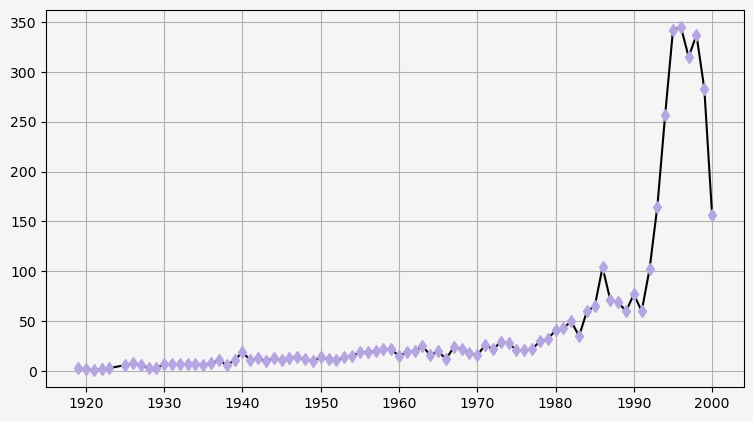

In [21]:

## Varaibale:
year_index = film.index.value_counts().sort_index()

## Figure:
fig = plt.figure(figsize=(9,5), 
                dpi=100, 
                facecolor = 'whitesmoke', edgecolor = None)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('whitesmoke')

# Plot:
year_index.plot(kind='line', 
                color='black', 
                marker='d', 
                markerfacecolor=('#b5a6e2'), 
                markeredgecolor=('#b5a6e2'))
plt.grid();

- How many movies are produced each year?  
For each year we have the number of films, the years stand out: 1996 (345), 1995 (342), 1998 (337).

- How is the film production curve?  
We can see that the number of movies per year is constantly increasing.  
From 1991 (60) to 1996 (345) the production of films increased by 475%